In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('globalterrorismdb_0718dist.csv')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17320\2599369726.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv')


In [8]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
cols_to_keep = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound']
df = df[cols_to_keep]

In [12]:
df.dropna(inplace=True)

In [13]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,1.0,0.0
5,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1,0,Armed Assault,Police,Firearms,0.0,0.0
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,0,0,Assassination,Police,Firearms,0.0,0.0
7,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1,0,Bombing/Explosion,Utilities,Explosives,0.0,0.0


In [14]:
attacks_by_country = df.groupby('country_txt')['iyear'].count().reset_index().sort_values('iyear', ascending=False)
attacks_by_region = df.groupby('region_txt')['iyear'].count().reset_index().sort_values('iyear', ascending=False)
     

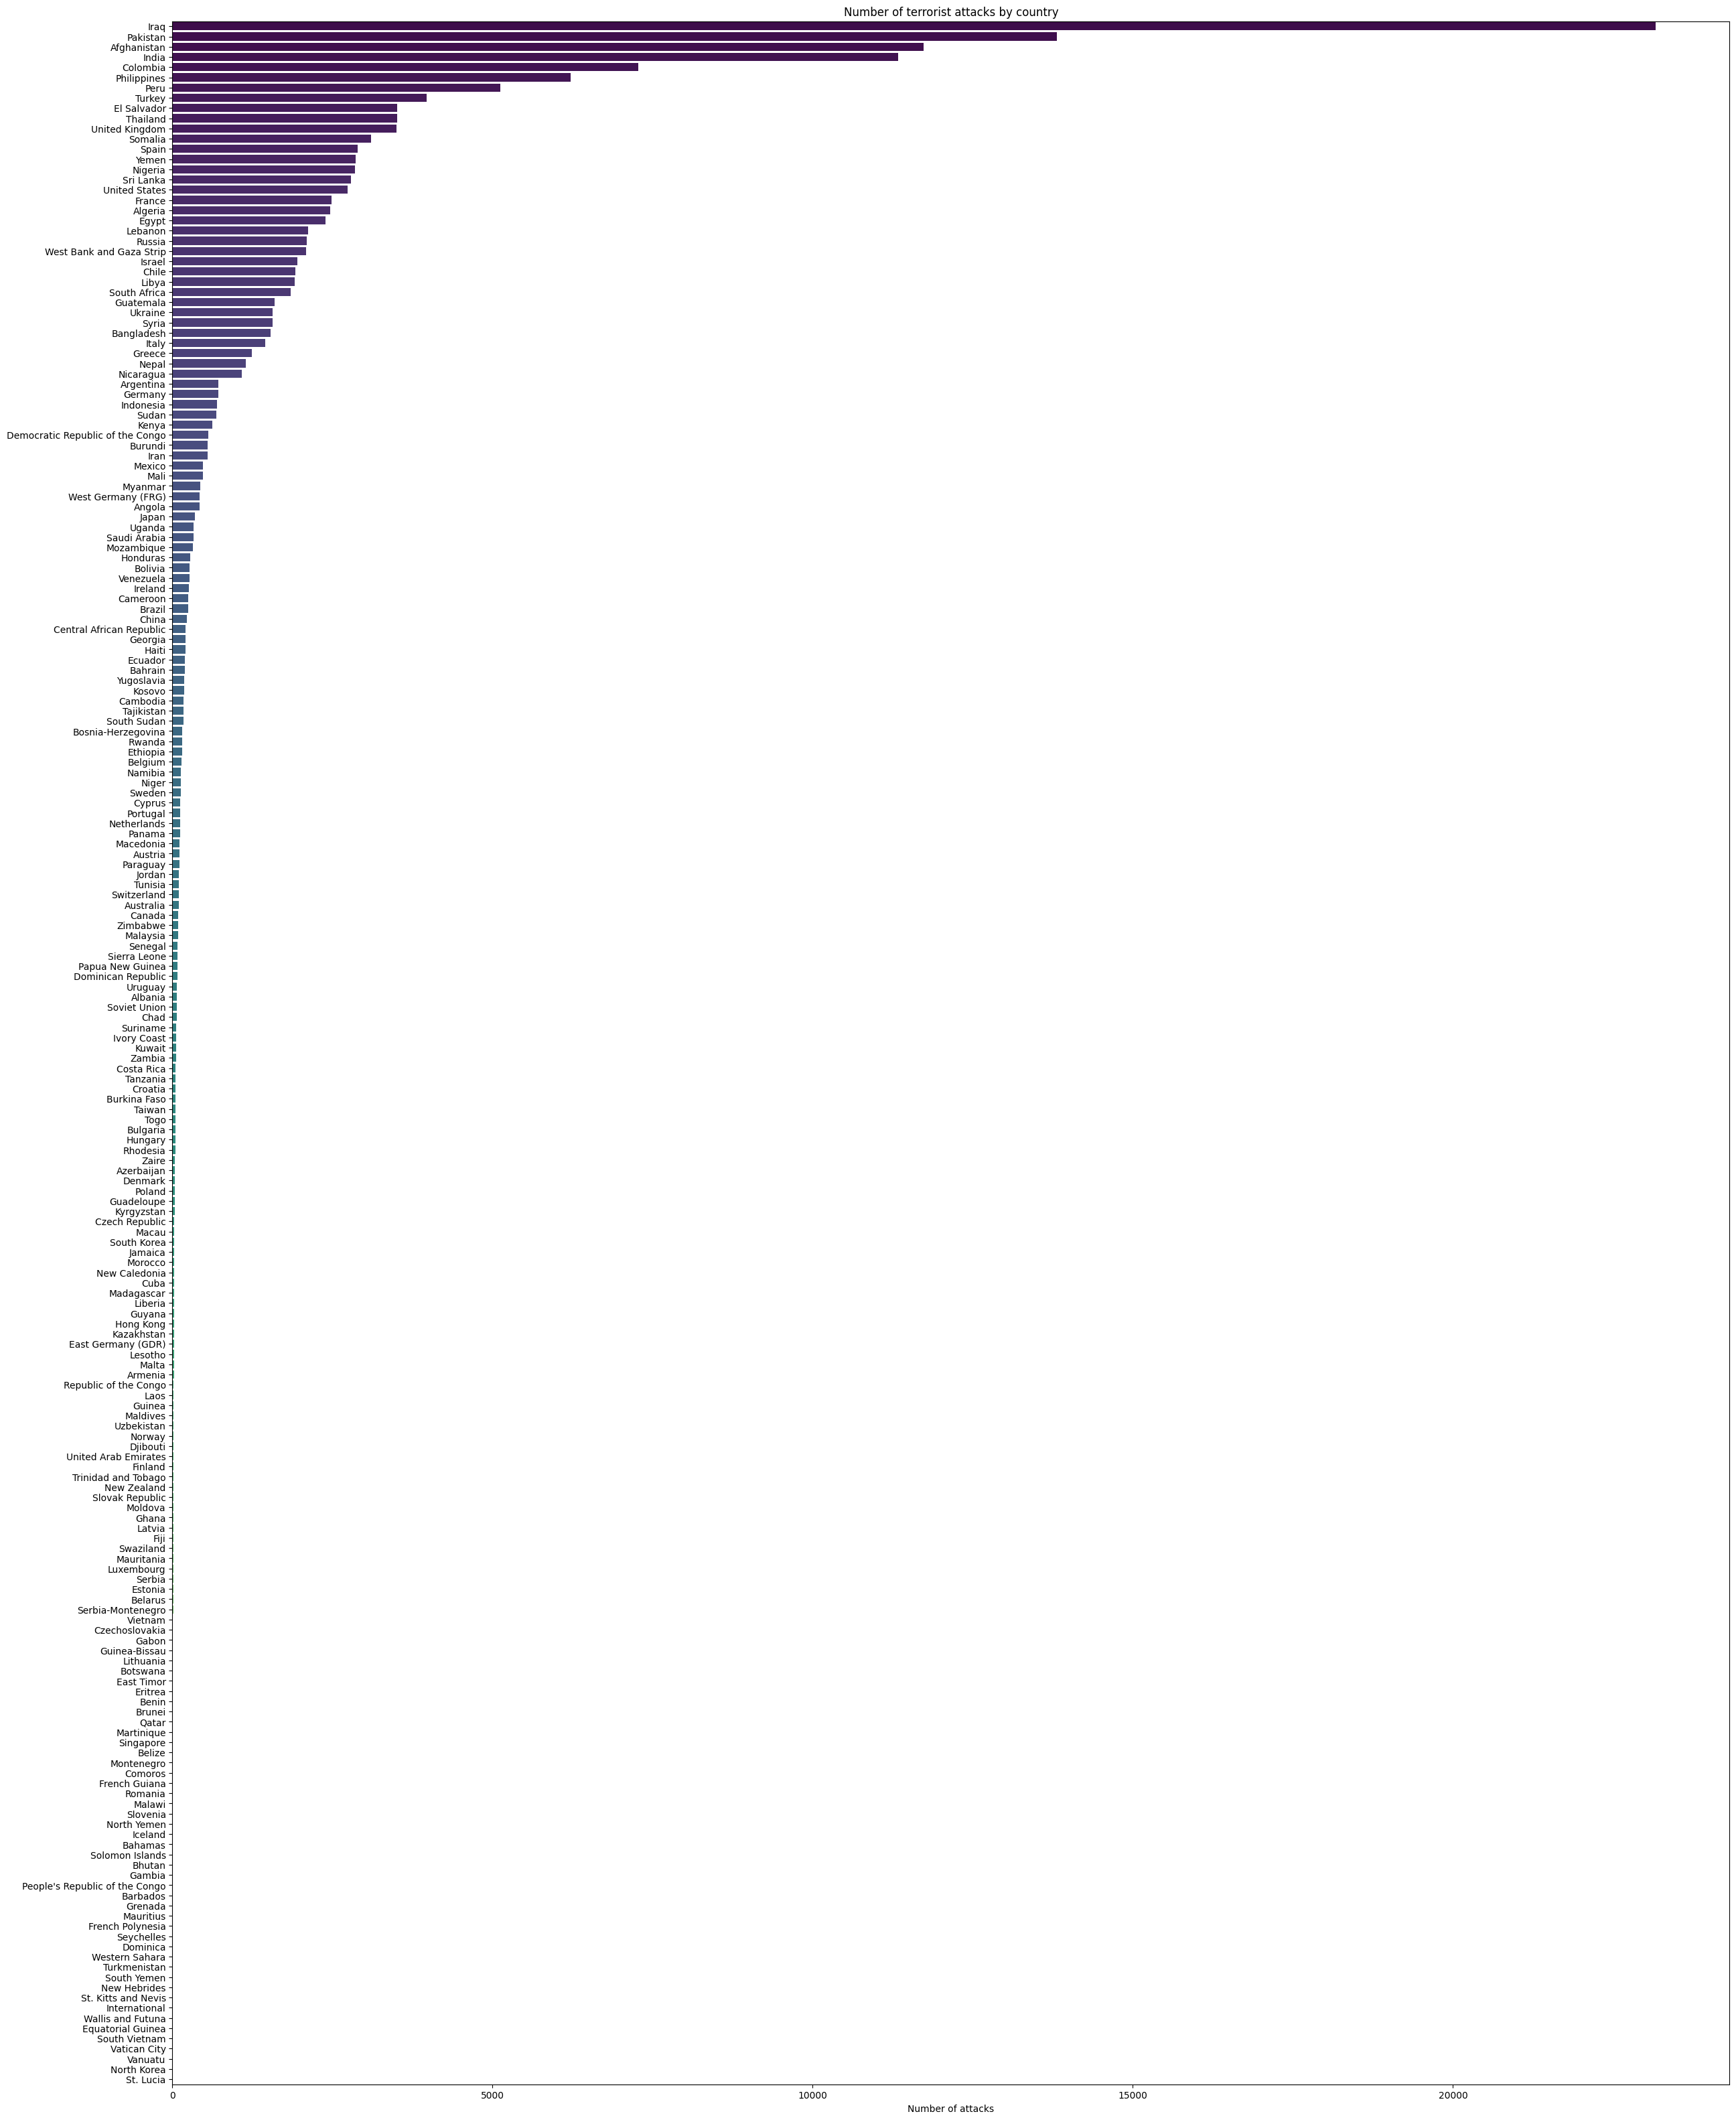

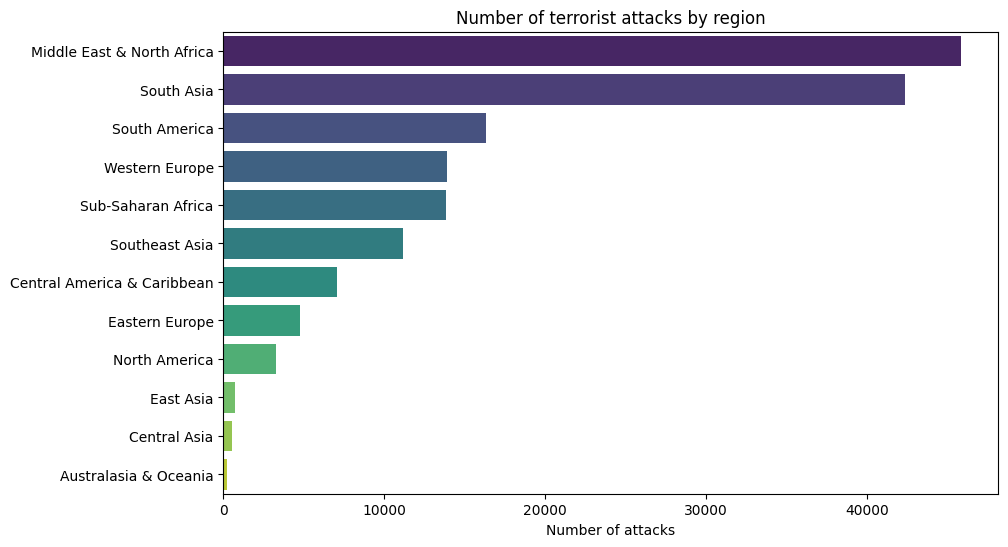

In [23]:
#Visualize the hot zones of terrorism by country and region
plt.figure(figsize=(30,40))
plt.title('Number of terrorist attacks by country')
sns.barplot(x='iyear', y='country_txt', data=attacks_by_country, palette='viridis')
plt.xlabel('Number of attacks')
plt.ylabel('')
plt.show()

plt.figure(figsize=(10, 6))
plt.title('Number of terrorist attacks by region')
sns.barplot(x='iyear', y='region_txt', data=attacks_by_region, palette='viridis')
plt.xlabel('Number of attacks')
plt.ylabel('')
plt.show()